<a href="https://colab.research.google.com/github/MarkNgendo/Multivariate_Analysis/blob/main/MLR_Mark_Ngendo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library Importation

In [112]:
# Importing needed libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot

## Data Loading

In [93]:
# Loading the dataset into the environment

df = pd.read_csv("/content/50_Startups.csv")


# Examining the first five rows of the dataset

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [94]:
# Inspecting the datatypes of the independent variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


As seen, there are four independent variables influencing the dependent(Profit) variable. The only categorical variable that need be encoded is State.

The numerical variables have to be on a similar scale to ensure no one variable has greater influence over the other simply becuase of the scale.


## Data Cleaning




### Completeness

In [95]:
# checking for null values

df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Consistency

In [96]:
# checking for duplicates

df.duplicated().sum()

0

### Uniformity

In [97]:
# renaming columns for easy referencing
# lower case names for columns to ease referencing

df.rename(columns = {'R&D Spend': 'rd_spend', 'Administration' : 'admin',
                                'Marketing Spend' : 'marketing',
                                'State' : 'state', 'Profit' : 'profit'},
                               inplace=True)

# the inplace argument ensures we do not need to create a new copy of
# the dataset to implement the changes.

## Data Preprocessing

In [98]:
# checking whether there are a finite number of categories for the state column
df['state'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [99]:
# checking for multicollinearity
corr = df.corr()

pd.DataFrame(np.linalg.inv(corr.values), index=corr.index, columns=corr.columns)

,rd_spend,admin,marketing,profit
rd_spend,19.563001,-1.002799,-0.270173,-18.629548
admin,-1.002799,1.182146,0.481290,0.378455
marketing,-0.270173,0.481290,2.465332,-1.677242
profit,-18.629548,0.378455,-1.677242,20.302917


A VIF of 1 indicates two variables are not correlated, a VIF between 1 and 5 indicates moderate correlation, and a VIF above 5 indicates high correlation.

Our variables are therefore not highly correlated.

In [100]:
# Encoding the categorical variable
encoder = LabelEncoder()

df['state'] = encoder.fit_transform(df['state'])

# casting as category to eliminate possible assumption of hierarchy

df['state'] = df['state'].astype('category')

df.head()

,rd_spend,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


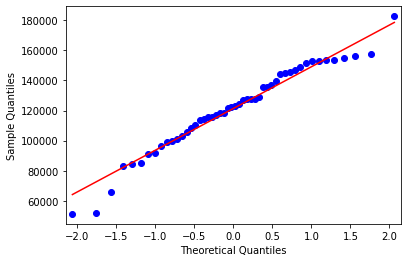

In [120]:
# Normality test for variables

qqplot(data=df['admin'], line='s')
plt.show()

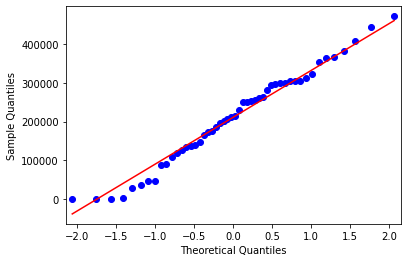

In [119]:
qqplot(data=df['marketing'], line='s')
plt.show()

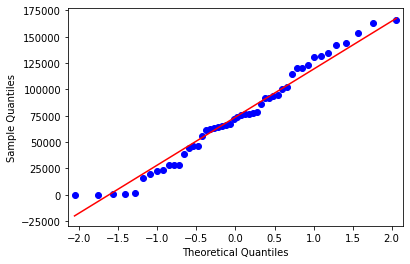

In [118]:
qqplot(data=df['rd_spend'], line='s')
plt.show()

All our predictors seem to be normally distributed. A good sign.

In [101]:
# Separating the variable from the predictors

X = df.drop(['profit'], axis=1)
y = df['profit']

In [102]:
# Splitting the test and train data
# test size of 20%
# random state=23 ensures reproducability of the same results.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [110]:
# Checking the split data.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40,)
(10,)


In [104]:
## Standardizing the numerical variables

# instantiating the standardizer
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[['marketing', 'admin', 'rd_spend']])
X_test = scaler.transform(X_test[['marketing', 'admin', 'rd_spend']])

In [105]:
# instantiating the model
model = LinearRegression()

# fitting the model

model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)

In [124]:
# since MLR uses a function where variables are asigned weights depending on their 
# contribution to the variable, we can view the coefficients assigned to them

model.coef_

array([ 2742.03637709,  -702.41966477, 40616.75371812])

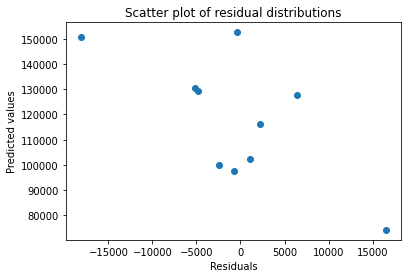

In [109]:
# checking residuals distribution

residuals = y_test - y_pred

plt.scatter(residuals, y_pred)
plt.title("Scatter plot of residual distributions")
plt.xlabel("Residuals")
plt.ylabel("Predicted values")
plt.show()

The residuals are seemingly homogenous.

This means that even our dataset met the conditions/assumptions we had listed in the lesson. This, by all means earlier defined, serves a valid example of the implementation of Multivariate analysis.